<a href="https://colab.research.google.com/github/Deekshetha0211/Spark-Foundation-Data-Science-Internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP: The Spark Foundation**

Data Science And Business Analytics

To Predict the percentage of marks of the students based on the number of hours they studied

*Author: DEEKSHETHA H R*

***TASK 1: Prediction using Supervised ML***

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Check if there any null value in the Dataset
s_data.isnull == True

False

*As there is no null value in the Dataset. So, we can now visualize our data*

***EXPLORATORY DATA ANALYSIS***

In [ ]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
s_data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

*Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:*

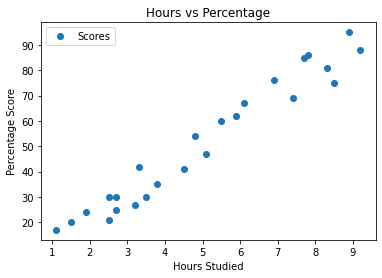

In [ ]:
# Plotting the distribution of scores
s_data.plot(x ='Hours', y ='Scores', style ='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*From the graph plotted above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

***TRAINING THE MODEL***

*The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).*

In [ ]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

***SPLITTING THIS DATA INTO TRAIN AND TEST SETS USING train_test_split() METHOD***

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

***TRAINING THE ALGORITHM***

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


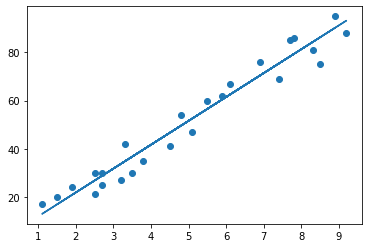

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

***MAKING PREDICTIONS***

*Now that we have trained our algorithm, it's time to make some predictions.*

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


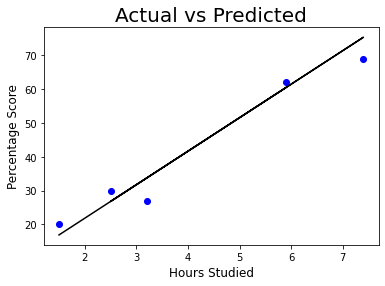

In [ ]:
plt.scatter(x = X_test, y = y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage Score', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

***Evaluating the model***

*The final step is to evaluate the performance of algorithm*

*This step is particularly important to compare how well different algorithms perform on a particular dataset. *

*For simplicity here, we have chosen the mean square error. There are many such metrics.*

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


***Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.***

In [ ]:
from sklearn import metrics 
metrics.r2_score(y_test,y_pred) ##goodness of fit test

0.9454906892105354

***What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?***

In [ ]:
# You can also test with your own data
predicting_score = regressor.predict([[9.25]])
predicting_score

array([93.69173249])

In [ ]:
print("Score = {}".format(round(predicting_score[0],3)))

Score = 93.692


***According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.***